In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
print(f"tensorflow version {tf.__version__}")

tensorflow version 2.1.0


In [7]:
tf.test.is_gpu_available(cuda_only=True)

True

In [8]:
mnist = tf.keras.datasets.mnist

In [9]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

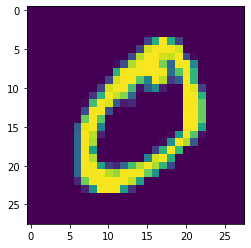

In [11]:
plt.imshow((x_train[1,:,:]))

In [29]:
x_train.shape

(60000, 28, 28)

## tensorflow functional API
create input node, and pass the node around as input to other layers, 
using the currying technique

model is a wrapper around first layer, and last layer

In [33]:
inputs = tf.keras.Input(shape=(28,28,1))
conv1 = tf.keras.layers.Conv2D(32,kernel_size=4, activation='relu')(inputs)
pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)
conv2 = tf.keras.layers.Conv2D(16,kernel_size=4, activation="relu")(pool1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv2)
flat = tf.keras.layers.Flatten()(pool2)
hidden1 = tf.keras.layers.Dense(100, activation="relu")(flat)
output = tf.keras.layers.Dense(10,activation="softmax")(hidden1)
model = tf.keras.models.Model(inputs=inputs, outputs=output)

In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 16)          8208      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2570

## compile the model

this step include loss, optimizer, and metrices

In [35]:
model.compile(nse

In [36]:
x_train_new = x_train.reshape(60000,28,28,1)

In [37]:
history = model.fit(x_train_new, y_train, batch_size=64, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 45us/sample - loss: 1.5928 - accuracy: 0.8746 - val_loss: 1.5055 - val_accuracy: 0.9580
Epoch 2/10
48000/48000 [==============================] - 2s 36us/sample - loss: 1.4985 - accuracy: 0.9645 - val_loss: 1.4989 - val_accuracy: 0.9639
Epoch 3/10
48000/48000 [==============================] - 2s 36us/sample - loss: 1.4882 - accuracy: 0.9741 - val_loss: 1.4832 - val_accuracy: 0.9788
Epoch 4/10
48000/48000 [==============================] - 2s 36us/sample - loss: 1.4825 - accuracy: 0.9800 - val_loss: 1.4803 - val_accuracy: 0.9822
Epoch 5/10
48000/48000 [==============================] - 2s 36us/sample - loss: 1.4811 - accuracy: 0.9811 - val_loss: 1.4796 - val_accuracy: 0.9820
Epoch 6/10
48000/48000 [==============================] - 2s 36us/sample - loss: 1.4782 - accuracy: 0.9836 - val_loss: 1.4806 - val_accuracy: 0.9812
Epoch 7/10
48000/48000 [==============================] 

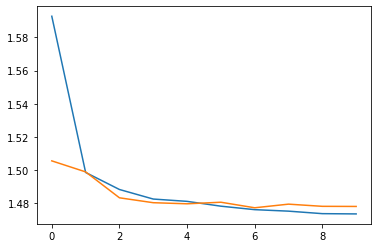

In [43]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

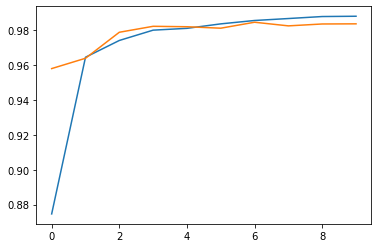

In [44]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])